In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod -600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 13.2MB/s]


In [3]:
from zipfile import ZipFile
dataset = "/content/heart-disease-dataset.zip"
with ZipFile(dataset, "r") as zip:
  zip.extractall()

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
heart = pd.read_csv("heart.csv")

In [7]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
heart.shape

(1025, 14)

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [42]:
heart.duplicated().any()

True

In [43]:
heart.drop_duplicates(inplace=True)

In [44]:
heart.duplicated().any()

False

In [45]:
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Data PreProcessing**

In [46]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
cat = []
num = []
for column in heart.columns:
  if heart[column].nunique() <= 10:
    cat.append(column)
  else:
    num.append(column)

print(f"Categorical : {cat}")
print(f"Numerical : {num}")

Categorical : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


**Pateint count by 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'**

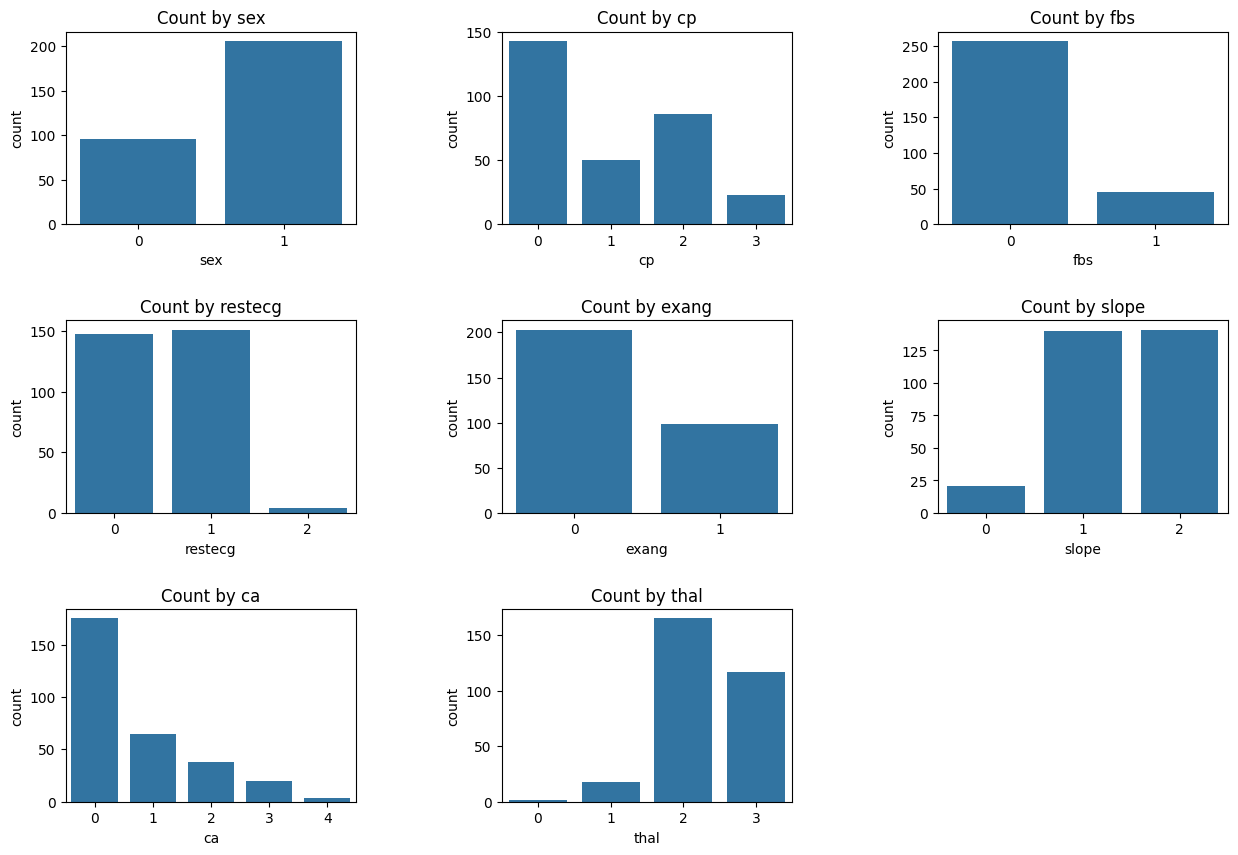

In [48]:
plt.figure(figsize=(15, 10))
n = 0
for i in  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
  n +=1
  plt.subplot(3, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.countplot(data=heart, x=i)
  plt.title(f"Count by {i}")
plt.show()

**Effect of 'age', 'trestbps', 'chol', 'thalach', 'oldpeak' on presence of heart disease**

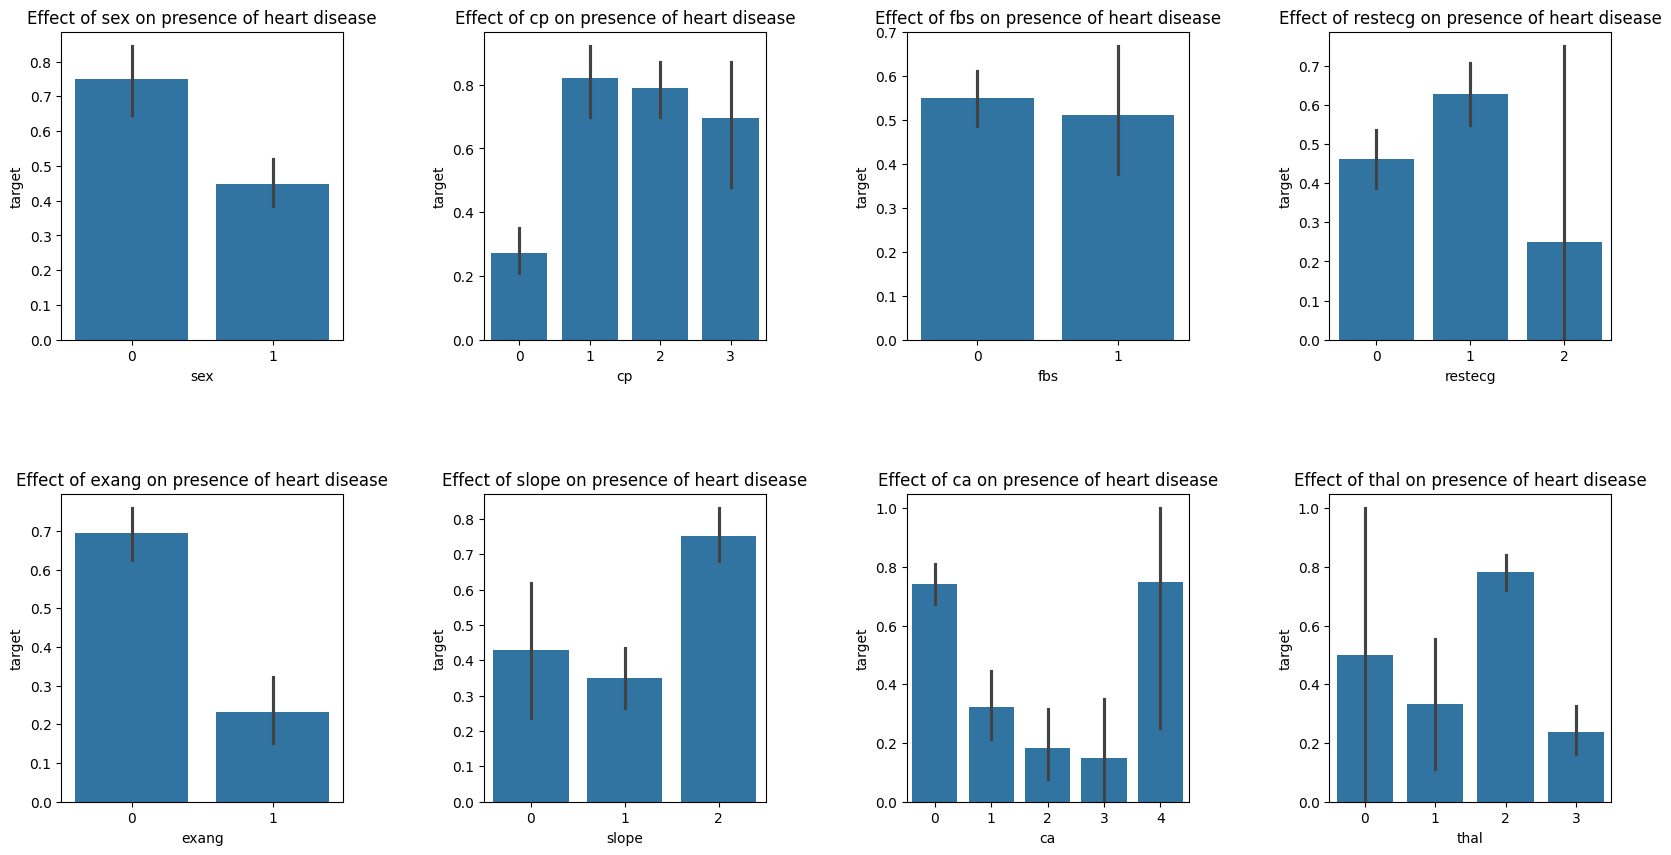

In [49]:
plt.figure(figsize=(20, 10))
n = 0
for i in  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
  n += 1
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.barplot(data=heart, x=i, y="target")
  plt.title(f"Effect of {i} on presence of heart disease")
plt.show()

**Distribution of 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'**

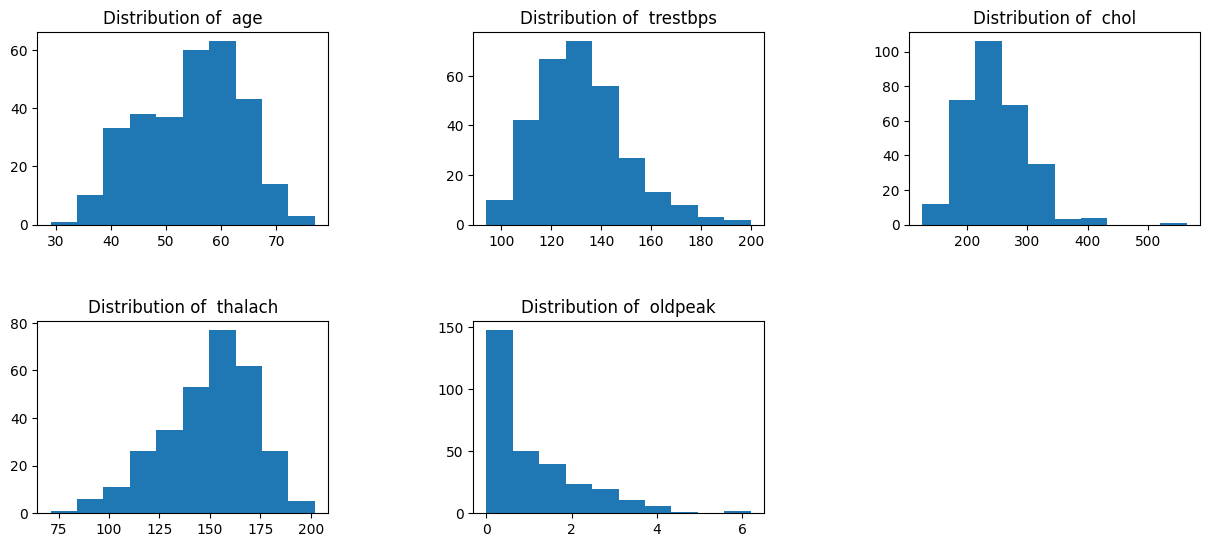

In [50]:
plt.figure(figsize=(15, 10))
n = 0
for i in  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
  n += 1
  plt.subplot(3, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  plt.hist(heart[i])
  plt.title(f"Distribution of  {i}")
plt.show()

**Spliting our data into x and y**

In [51]:
x = heart.drop(columns="target", axis=1)
y = heart["target"]

**Spliting data into testing and training**

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [75]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}, x_test : {x_test.shape}, y_test : {y_test.shape}")

x_train : (241, 13), y_train : (241,), x_test : (61, 13), y_test : (61,)


**Build our model**

In [76]:
model = LogisticRegression(max_iter=1000)

In [77]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

**Training Predict and Accuracy Score**

In [78]:
x_train_predict = model.predict(x_train)
x_train_acc = accuracy_score(y_train, x_train_predict)
print(f"Training Accuracy : {x_train_acc}")

Training Accuracy : 0.8464730290456431


**Testing Predict and Accuracy Score**

In [79]:
x_test_predict = model.predict(x_test)
x_test_acc = accuracy_score(y_test, x_test_predict)
print(f"Testing Accuracy : {x_test_acc}")

Testing Accuracy : 0.819672131147541


**Predictive Model**

In [82]:
input_data = np.asarray([43,1,0,120,177,0,0,120,1,2.5,1,0,3]).reshape(1, -1)

In [83]:
input_predict = model.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [84]:
print(input_predict)

[0]


In [85]:
if input_predict[0] == 0:
  print("Patient do not have heart disease")
else:
  print("Unfortunately, Patient have heart disease")

Patient do not have heart disease
